In [1]:
# module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
from sklearn.decomposition import PCA

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA


# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef, precision_score, recall_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(1635848)

In [2]:
# fetch the training file
file_path_full_training_set = '/kaggle/input/kdd-data/KDDTrain.txt'
file_path_test = '/kaggle/input/kdd-data/KDDTest.txt'

In [3]:
df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)

In [4]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [5]:
df.columns = columns
test_df.columns = columns

In [6]:
# Categorical features analysis
print('Training set categorical features:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Training set categorical features:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'attack' has 23 categories


In [7]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'attack' has 23 categories


In [8]:
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6859
Name: count, dtype: int64


In [9]:
# Test set
print('Test set:')
for col_name in test_df.columns:
    if test_df[col_name].dtypes == 'object' :
        unique_cat = len(test_df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'attack' has 38 categories


In [10]:
# Attack Distribution Comparison Analysis
print("="*60)
print("ATTACK TYPE DISTRIBUTION ANALYSIS")
print("="*60)

print("\nTraining Set Attack Distribution:")
print(df['attack'].value_counts().head(10))

print("\nTest Set Attack Distribution:")
print(test_df['attack'].value_counts().head(10))

print("\nUnique Attacks Comparison:")
train_attacks = set(df['attack'].unique())
test_attacks = set(test_df['attack'].unique())

print(f"Training attacks: {len(train_attacks)} unique types")
print(f"Test attacks: {len(test_attacks)} unique types")

attacks_only_in_train = train_attacks - test_attacks
attacks_only_in_test = test_attacks - train_attacks
common_attacks = train_attacks.intersection(test_attacks)

print(f"\nAttacks ONLY in training: {len(attacks_only_in_train)}")
if attacks_only_in_train:
    print(f"   {list(attacks_only_in_train)}")

print(f"\nAttacks ONLY in test: {len(attacks_only_in_test)}")  
if attacks_only_in_test:
    print(f"   {list(attacks_only_in_test)}")

print(f"\nCommon attacks: {len(common_attacks)}")

ATTACK TYPE DISTRIBUTION ANALYSIS

Training Set Attack Distribution:
attack
normal         67342
neptune        41214
satan           3633
ipsweep         3599
portsweep       2931
smurf           2646
nmap            1493
back             956
teardrop         892
warezclient      890
Name: count, dtype: int64

Test Set Attack Distribution:
attack
normal          9711
neptune         4656
guess_passwd    1231
mscan            996
warezmaster      944
apache2          737
satan            735
processtable     685
smurf            665
back             359
Name: count, dtype: int64

Unique Attacks Comparison:
Training attacks: 23 unique types
Test attacks: 38 unique types

Attacks ONLY in training: 2
   ['warezclient', 'spy']

Attacks ONLY in test: 17
   ['sqlattack', 'xsnoop', 'sendmail', 'udpstorm', 'saint', 'mailbomb', 'named', 'worm', 'ps', 'xterm', 'processtable', 'snmpguess', 'httptunnel', 'snmpgetattack', 'apache2', 'xlock', 'mscan']

Common attacks: 21


In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Define categorical columns for encoding
categorical_columns = ['protocol_type', 'service', 'flag']

# Extract categorical values
df_categorical_values = df[categorical_columns]
testdf_categorical_values = test_df[categorical_columns]
df_categorical_values.head()

,protocol_type,service,flag
0,udp,other,SF
1,tcp,private,S0
2,tcp,http,SF
3,tcp,http,SF
4,tcp,private,REJ


In [12]:
# Generate column names for categorical encoding
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]

# Use combined unique services from both train and test sets
unique_service_train = set(df.service.unique())
unique_service_test = set(test_df.service.unique())
unique_service_combined = sorted(list(unique_service_train.union(unique_service_test)))
string2 = 'service_'
unique_service2 = [string2 + x for x in unique_service_combined]

# Flag columns
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]

# Combined columns for consistent encoding
dumcols = unique_protocol2 + unique_service2 + unique_flag2
testdumcols = dumcols

print(f"Total columns: {len(dumcols)}")
print(f"Protocol columns: {len(unique_protocol2)}")  
print(f"Service columns: {len(unique_service2)}")
print(f"Flag columns: {len(unique_flag2)}")

print(f"\nServices only in train: {unique_service_train - unique_service_test}")
print(f"Services only in test: {unique_service_test - unique_service_train}")
print(f"Combined services: {len(unique_service_combined)}")

Total columns: 84
Protocol columns: 3
Service columns: 70
Flag columns: 11

Services only in train: {'red_i', 'http_8001', 'http_2784', 'harvest', 'urh_i', 'aol'}
Services only in test: set()
Combined services: 70


In [13]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              2       44     9
1              1       49     5
2              1       24     9
3              1       24     9
4              1       49     1


In [14]:
# OneHot encoding with proper handling of different categorical values
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Combine train and test categorical data to capture all possible categories
combined_categorical = pd.concat([df_categorical_values_enc, testdf_categorical_values_enc], ignore_index=True)

# Fit encoder on combined data to handle all categories consistently
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit(combined_categorical)

# Transform train and test sets
df_categorical_values_encenc = enc.transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc, columns=dumcols)

testdf_categorical_values_encenc = enc.transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc, columns=dumcols)

print(f"Train set categorical shape: {df_cat_data.shape}")
print(f"Test set categorical shape: {testdf_cat_data.shape}")
print(f"Column names match: {list(df_cat_data.columns) == list(testdf_cat_data.columns)}")

df_cat_data.head()

Train set categorical shape: (125972, 84)
Test set categorical shape: (22543, 84)
Column names match: True


,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Verify column structure consistency
print("Column structure verification:")
print(f"Train categorical shape: {df_cat_data.shape}")
print(f"Test categorical shape: {testdf_cat_data.shape}")
print(f"Columns match: {df_cat_data.shape[1] == testdf_cat_data.shape[1]}")

Column structure verification:
Train categorical shape: (125972, 84)
Test categorical shape: (22543, 84)
Columns match: True


In [16]:
# Final verification of column structure consistency
print("Column structure consistency achieved")

print(f"Final train categorical shape: {df_cat_data.shape}")
print(f"Final test categorical shape: {testdf_cat_data.shape}")
assert df_cat_data.shape[1] == testdf_cat_data.shape[1], "Column count mismatch!"
print("Verification complete - ready to proceed")

Column structure consistency achieved
Final train categorical shape: (125972, 84)
Final test categorical shape: (22543, 84)
Verification complete - ready to proceed


In [17]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=test_df.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=test_df.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125972, 124)
(22543, 124)
(125972, 124)
(22543, 124)


In [18]:
# take label column
labeldf=newdf['attack']
labeldf_test=newdf_test['attack']
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newdf['attack'] = newlabeldf
newdf_test['attack'] = newlabeldf_test
print(newdf['attack'].head())


0    0
1    1
2    0
3    0
4    1
Name: attack, dtype: int64


/tmp/ipykernel_36/1623462165.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
/tmp/ipykernel_36/1623462165.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm'

In [19]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['attack'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['attack'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['attack'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['attack'].isin(to_drop_U2R)];

#test
DoS_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113269, 124)
Dimensions of Probe: (78998, 124)
Dimensions of R2L: (68337, 124)
Dimensions of U2R: (67394, 124)
Test:
Dimensions of DoS: (17170, 124)
Dimensions of Probe: (12132, 124)
Dimensions of R2L: (12596, 124)
Dimensions of U2R: (9778, 124)


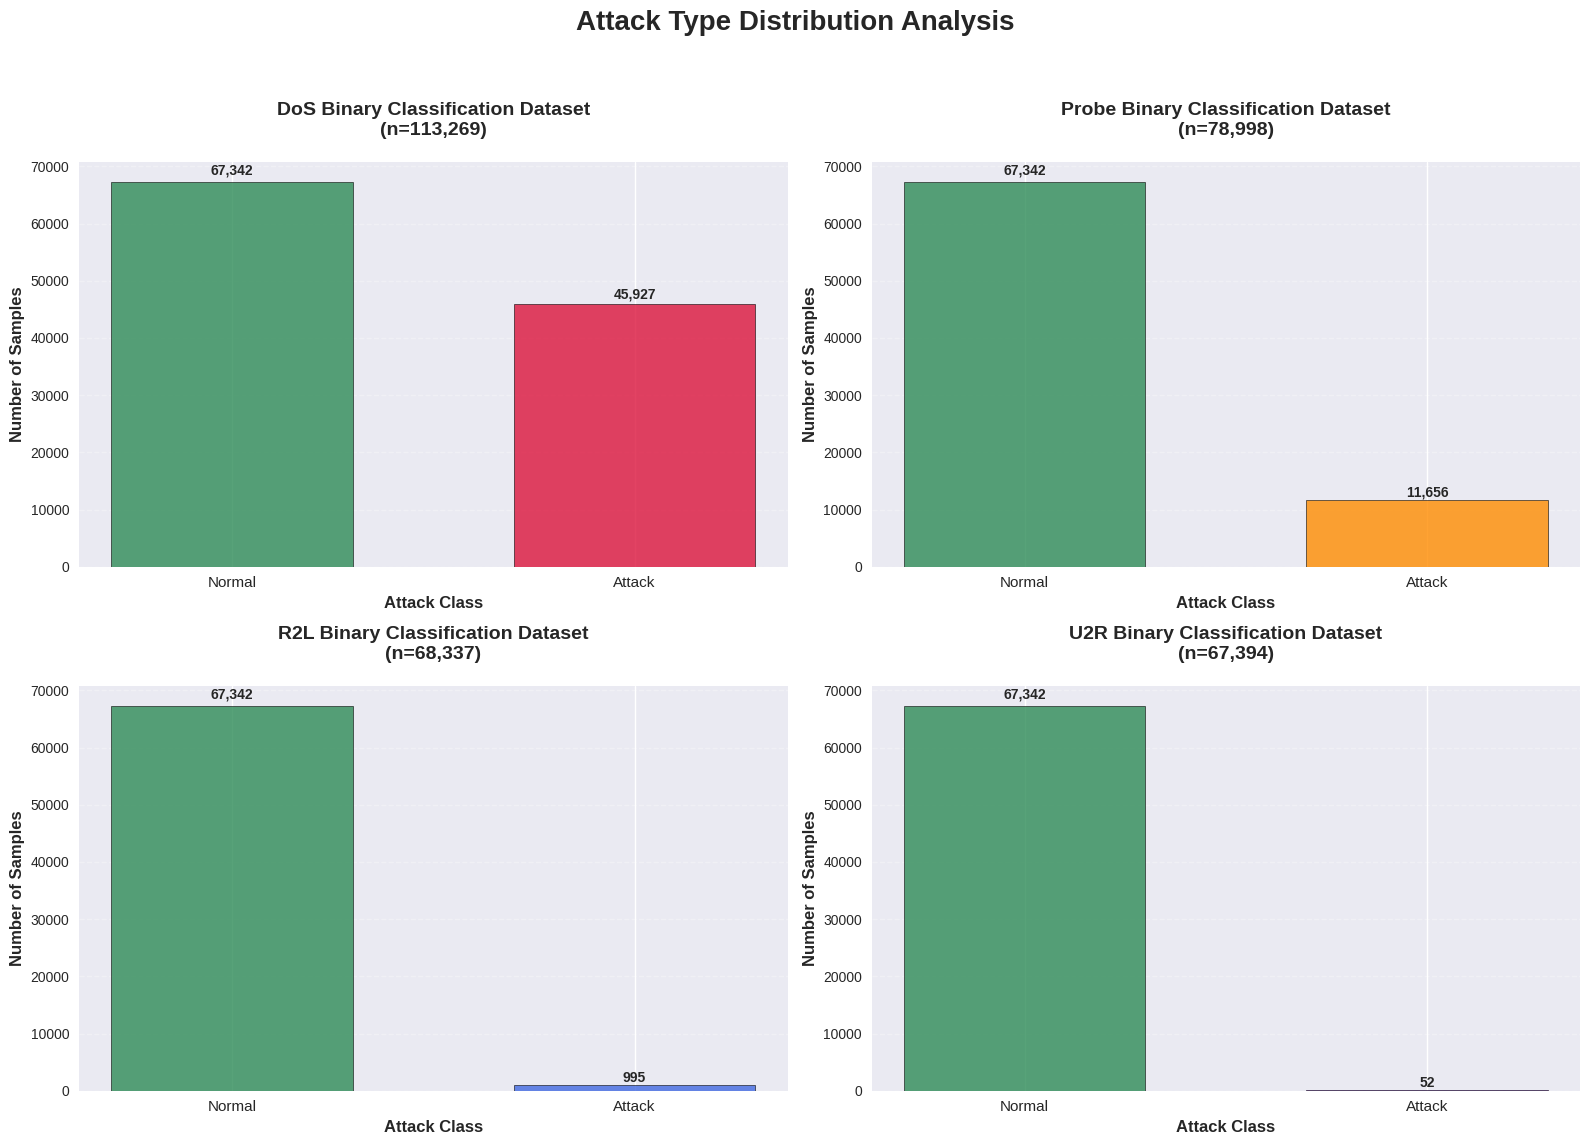

In [20]:
# Create professional visualizations for attack type distributions
plt.style.use('seaborn-v0_8')  # Professional style
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Attack Type Distribution Analysis', fontsize=20, fontweight='bold', y=0.98)

# Define color palette
colors = {
    'normal': '#2E8B57',    # Sea green
    'dos': '#DC143C',       # Crimson
    'probe': '#FF8C00',     # Dark orange
    'r2l': '#4169E1',       # Royal blue
    'u2r': '#8A2BE2'        # Blue violet
}

# Consistent settings
bar_width = 0.6
x_labels = ['Normal', 'Attack']

# Dataset configs
datasets = [
    ('DoS', DoS_df, colors['dos'], axes[0, 0]),
    ('Probe', Probe_df, colors['probe'], axes[0, 1]),
    ('R2L', R2L_df, colors['r2l'], axes[1, 0]),
    ('U2R', U2R_df, colors['u2r'], axes[1, 1])
]

# Generate all plots consistently
for name, df, attack_color, ax in datasets:
    counts = df['attack'].value_counts().sort_index()
    normal_count = counts.get(0, 0)
    attack_count = counts.iloc[-1] if len(counts) > 1 else 0

    bars = ax.bar([0, 1], [normal_count, attack_count], width=bar_width,
                  color=[colors['normal'], attack_color],
                  alpha=0.8, edgecolor='black', linewidth=0.5)

    ax.set_title(f'{name} Binary Classification Dataset\n(n={len(df):,})',
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Attack Class', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(x_labels, fontsize=11)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    # Add labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

# Final layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [21]:
# Professional statistical summary table 
print("\n" + "="*80) 
print("COMPREHENSIVE ATTACK DISTRIBUTION ANALYSIS") 
print("="*80) 

# Create a professional summary table 
datasets = [('DoS', DoS_df), ('Probe', Probe_df), ('R2L', R2L_df), ('U2R', U2R_df)] 

for name, df in datasets:
    attack_dist = df['attack'].value_counts().sort_index()
    total = len(df)
    normal_count = attack_dist.get(0, 0)
    attack_count = attack_dist.iloc[-1] if len(attack_dist) > 1 else 0
    normal_pct = (normal_count/total) * 100
    attack_pct = (attack_count/total) * 100
    
    print(f"\n{name.upper()} ATTACK CATEGORY:")
    print(f"{'─' * 50}")
    print(f"│ {'Metric':<20} │ {'Normal':<12} │ {name:<12} │")
    print(f"│ {'─' * 20} │ {'─' * 12} │ {'─' * 12} │")
    print(f"│ {'Count':<20} │ {normal_count:>10,} │ {attack_count:>10,} │")
    print(f"│ {'Percentage':<20} │ {normal_pct:>9.2f}% │ {attack_pct:>9.2f}% │")
    print(f"│ {'Total Samples':<20} │ {total:>25,} │")
    balance_status = 'Severely Imbalanced' if max(normal_pct, attack_pct) > 95 else 'Imbalanced'
    print(f"│ {'Class Balance':<20} │ {balance_status:>25} │")
    print(f"{'─' * 50}")

# Overall dataset comparison
print(f"\n{'DATASET COMPARISON SUMMARY':<50}")
print("="*80)
print(f"{'Dataset':<12} {'Total Samples':<15} {'Normal %':<12} {'Attack %':<12} {'Balance Status':<15}")
print("-" * 80)

for name, df in datasets:
    attack_dist = df['attack'].value_counts().sort_index()
    total = len(df)
    normal_count = attack_dist.get(0, 0)
    attack_count = attack_dist.iloc[-1] if len(attack_dist) > 1 else 0
    normal_pct = (normal_count/total) * 100
    attack_pct = (attack_count/total) * 100
    balance_status = "Severely Imbalanced" if max(normal_pct, attack_pct) > 95 else "Imbalanced"
    print(f"{name:<12} {total:>13,} {normal_pct:>10.1f}% {attack_pct:>10.1f}% {balance_status:<15}")


COMPREHENSIVE ATTACK DISTRIBUTION ANALYSIS

DOS ATTACK CATEGORY:
──────────────────────────────────────────────────
│ Metric               │ Normal       │ DoS          │
│ ──────────────────── │ ──────────── │ ──────────── │
│ Count                │     67,342 │     45,927 │
│ Percentage           │     59.45% │     40.55% │
│ Total Samples        │                   113,269 │
│ Class Balance        │                Imbalanced │
──────────────────────────────────────────────────

PROBE ATTACK CATEGORY:
──────────────────────────────────────────────────
│ Metric               │ Normal       │ Probe        │
│ ──────────────────── │ ──────────── │ ──────────── │
│ Count                │     67,342 │     11,656 │
│ Percentage           │     85.25% │     14.75% │
│ Total Samples        │                    78,998 │
│ Class Balance        │                Imbalanced │
──────────────────────────────────────────────────

R2L ATTACK CATEGORY:
────────────────────────────────────────────────

In [22]:
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables
X_DoS = DoS_df.drop('attack', axis=1)
Y_DoS = DoS_df.attack
X_Probe = Probe_df.drop('attack', axis=1)
Y_Probe = Probe_df.attack
X_R2L = R2L_df.drop('attack', axis=1)
Y_R2L = R2L_df.attack
X_U2R = U2R_df.drop('attack', axis=1)
Y_U2R = U2R_df.attack
# test set
X_DoS_test = DoS_df_test.drop('attack', axis=1)
Y_DoS_test = DoS_df_test.attack
X_Probe_test = Probe_df_test.drop('attack', axis=1)
Y_Probe_test = Probe_df_test.attack
X_R2L_test = R2L_df_test.drop('attack', axis=1)
Y_R2L_test = R2L_df_test.attack
X_U2R_test = U2R_df_test.drop('attack', axis=1)
Y_U2R_test = U2R_df_test.attack

In [23]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

In [24]:
from sklearn import preprocessing

# Feature scaling - fit on training data, transform both train and test
scaler_R = preprocessing.StandardScaler().fit(X_R2L)
X_R2L = scaler_R.transform(X_R2L)
X_R2L_test = scaler_R.transform(X_R2L_test)

In [25]:
# Verify standardization results
print("Standard deviation check (should be ~1.0):")
print(X_R2L.std(axis=0)[:10])  # Show first 10 features

Standard deviation check (should be ~1.0):
[1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


In [26]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_newR2L = selector.fit_transform(X_R2L,Y_R2L)
X_newR2L.shape

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  4  16  44  45  47  48  49  50  51  52  55  58  59  63  64  65  67  68
  69  71  72  73  74  75  77  78  79  80  81  82  83  84  87  88  90  93
  94  97  99 100 101 108 109 110 111 115] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(68337, 13)

In [27]:
true=selector.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L )
newcolname_R2L

['dst_bytes',
 'hot',
 'num_failed_logins',
 'is_guest_login',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'level',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_imap4',
 'flag_RSTO']

In [28]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe.fit(X_R2L, Y_R2L)
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [29]:
# Display selected features for R2L classification
print('Features selected for R2L classification:')
for feature in rfecolname_R2L:
    print(f"  - {feature}")

Features selected for R2L classification:
  - duration
  - src_bytes
  - dst_bytes
  - hot
  - logged_in
  - num_root
  - serror_rate
  - dst_host_count
  - dst_host_srv_count
  - dst_host_srv_diff_host_rate
  - dst_host_srv_serror_rate
  - level
  - service_ftp_data


In [30]:
print(X_rfeR2L.shape)

(68337, 13)


In [31]:
# Train decision tree classifier
clf_R2L = DecisionTreeClassifier(random_state=0)

# Fit classifier
clf_R2L.fit(X_R2L, Y_R2L)

DecisionTreeClassifier(random_state=0)

In [32]:
# Train classifier with RFE-selected features

clf_rfeR2L = DecisionTreeClassifier(random_state=0)
clf_rfeR2L.fit(X_rfeR2L, Y_R2L)

DecisionTreeClassifier(random_state=0)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

print("Evaluation Methodology Comparison:")
print("="*50)

# Cross-validation on training data (demonstrates inflated scores)
print("Cross-Validation on Training Data:")
accuracy = cross_val_score(clf_R2L, X_R2L, Y_R2L, cv=10, scoring='accuracy')
print("   CV Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

print("\nTrain-Test Evaluation:")
# Proper evaluation on test set 
clf_R2L.fit(X_R2L, Y_R2L)
Y_pred = clf_R2L.predict(X_R2L_test)

print("   Test Accuracy:", metrics.accuracy_score(Y_R2L_test, Y_pred))
print("   Test Precision:", metrics.precision_score(Y_R2L_test, Y_pred, pos_label=3))
print("   Test Recall:", metrics.recall_score(Y_R2L_test, Y_pred, pos_label=3))
print("   Test F1:", metrics.f1_score(Y_R2L_test, Y_pred, pos_label=3))

Evaluation Methodology Comparison:
Cross-Validation on Training Data:
   CV Accuracy: 0.99921 (+/- 0.00067)

Train-Test Evaluation:
   Test Accuracy: 0.8028739282311845
   Test Precision: 0.9785714285714285
   Test Recall: 0.14246100519930677
   Test F1: 0.248714069591528


In [34]:
X_R2L_test2 = X_R2L_test[:, rfecolindex_R2L]

Y_R2L_pred2 = clf_rfeR2L.predict(X_R2L_test2)

# Confusion matrix
print(pd.crosstab(Y_R2L_test, Y_R2L_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks']))

# Final evaluation on test set (no CV here)
print("Test Accuracy:", metrics.accuracy_score(Y_R2L_test, Y_R2L_pred2))
print("Test Precision:", metrics.precision_score(Y_R2L_test, Y_R2L_pred2, pos_label=3))
print("Test Recall:", metrics.recall_score(Y_R2L_test, Y_R2L_pred2, pos_label=3))
print("Test F1:", metrics.f1_score(Y_R2L_test, Y_R2L_pred2, pos_label=3))

Predicted attacks     0    3
Actual attacks              
0                  9709    2
3                  2458  427
Test Accuracy: 0.8046999047316609
Test Precision: 0.9953379953379954
Test Recall: 0.14800693240901214
Test F1: 0.2576946288473144


In [35]:
# RFE Feature Selection Evaluation
print("RFE-based Feature Selection Performance:")
print("="*50)

# Train model with RFE-selected features
clf_rfeR2L.fit(X_R2L[:, rfecolindex_R2L], Y_R2L)
Y_pred_rfe = clf_rfeR2L.predict(X_R2L_test[:, rfecolindex_R2L])

print("Test Performance with RFE Features:")
print(f"Test Accuracy: {metrics.accuracy_score(Y_R2L_test, Y_pred_rfe):.5f}")
print(f"Test Precision: {metrics.precision_score(Y_R2L_test, Y_pred_rfe, pos_label=3):.5f}")
print(f"Test Recall: {metrics.recall_score(Y_R2L_test, Y_pred_rfe, pos_label=3):.5f}")
print(f"Test F1-Score: {metrics.f1_score(Y_R2L_test, Y_pred_rfe, pos_label=3):.5f}")

RFE-based Feature Selection Performance:
Test Performance with RFE Features:
Test Accuracy: 0.80470
Test Precision: 0.99534
Test Recall: 0.14801
Test F1-Score: 0.25769


In [36]:
X_R2L = np.array(X_R2L)
X_R2L_test = np.array(X_R2L_test)
#cnn-input
X_R2L = np.reshape(X_R2L, (X_R2L.shape[0], X_R2L.shape[1], 1))
X_R2L_test = np.reshape(X_R2L_test, (X_R2L_test.shape[0], X_R2L_test.shape[1], 1))
#lstm-input

In [37]:
Y_R2L = np.array(Y_R2L)
Y_R2L_test = np.array(Y_R2L_test)

In [38]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from keras.optimizers import Adam

2025-09-01 10:22:30.181904: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756722150.530678      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756722150.631720      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [39]:
import os

# Define a learning rate schedule
initial_learning_rate = 0.001
def lr_schedule(epoch):
    return initial_learning_rate * (0.1 ** (epoch // 10))

output_dir = '/kaggle/working/'
model_dir = os.path.join(output_dir, 'models')
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'best_cnn_lstm_dos_model.h5')

print(f"Model will be saved to: {model_path}")

my_callbacks = [
    ModelCheckpoint(
        filepath=model_path, 
        verbose=1, 
        save_best_only=True, 
        monitor='val_accuracy', 
        mode='max'
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1,
        min_delta=0.001
    ),
    LearningRateScheduler(lr_schedule, verbose=1)
]

Model will be saved to: /kaggle/working/models/best_cnn_lstm_dos_model.h5


In [40]:
# CNN-LSTM Model Implementation
model = Sequential()

# Convolutional layers with L2 regularization
model.add(Conv1D(64, 3, padding="same", input_shape=(X_R2L.shape[1], 1), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Conv1D(64, 3, padding="same", activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.001)))
model.add(Conv1D(128, 3, padding="same", activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling1D(pool_size=2))

# Batch normalization
model.add(BatchNormalization())

# LSTM layer with regularization and dropout
model.add(LSTM(units=100, return_sequences=False, dropout=0.1, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Model compilation with Focal Loss
opt = Adam(learning_rate=initial_learning_rate)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Proper validation strategy using train-validation split
from sklearn.model_selection import train_test_split

print("Validation Strategy: Stratified train-validation split")
print("Test set reserved for final evaluation only")

# Split training data (80/20)
X_train, X_val, y_train, y_val = train_test_split(
    X_R2L, Y_R2L, 
    test_size=0.2, 
    stratify=Y_R2L,
    random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Test samples: {X_R2L_test.shape[0]}")

# Environment-independent callbacks
my_callbacks_proper = [
    ModelCheckpoint(
        filepath=model_path, 
        verbose=1, 
        save_best_only=True, 
        monitor='val_loss',
        mode='min'
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1,
        min_delta=0.001
    ),
    LearningRateScheduler(lr_schedule, verbose=1)
]

# Model training
print(f"\nTraining CNN-LSTM model...")
print(f"Model will be saved to: {model_path}")
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=my_callbacks_proper
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1756722168.431919      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756722168.432625      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Validation Strategy: Stratified train-validation split
Test set reserved for final evaluation only
Training samples: 54669
Validation samples: 13668
Test samples: 12596

Training CNN-LSTM model...
Model will be saved to: /kaggle/working/models/best_cnn_lstm_dos_model.h5

Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/50


I0000 00:00:1756722175.340429     108 cuda_dnn.cc:529] Loaded cuDNN version 90300


855/855 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9703 - loss: 0.6601
Epoch 1: val_loss improved from inf to -0.52506, saving model to /kaggle/working/models/best_cnn_lstm_dos_model.h5
855/855 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9703 - loss: 0.6594 - val_accuracy: 0.9837 - val_loss: -0.5251 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/50
850/855 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9806 - loss: -0.4958
Epoch 2: val_loss did not improve from -0.52506
855/855 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9805 - loss: -0.4963 - val_accuracy: 0.8645 - val_loss: 2.4530 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/50
851/855 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9780 - loss: -0.4235
Epoch 3: val_loss improved from -0.52506 to -0.94189, saving model to /kaggle/working/models/best_cnn_lstm_dos_model.h5
855/855 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0

In [41]:
y_pred = model.predict(X_R2L_test)

394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [42]:
y_pred1 = []
for i in y_pred:
  if i>=0.5:
    y_pred1.append(3)
  else:
    y_pred1.append(0)

In [43]:
y_pred = np.array(y_pred1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_R2L_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      9711
           3       0.95      0.27      0.42      2885

    accuracy                           0.83     12596
   macro avg       0.89      0.63      0.66     12596
weighted avg       0.85      0.83      0.79     12596

